# **Proyecto Integrador - Avance 5. Modelo Final**
## **Tecnologico de Monterrey**
------------------------------------------------------------------
### Profa. Dra. Grettel Barceló Alonso

### Prof. Dr. Luis Eduardo Falcón Morales

### Profa. Verónica Sandra Guzmán de Valle
------------------------------------------------------------------
### Marcela Alejandra Rosales Jiménez - A01032022
### José Antonio Mendoza Castro - A01794067

## **1. Preparación de ambiente**

### Instalacion de librerias

In [1]:
!pip install -q transformers

### Librerias

In [2]:
import pandas as pd
import spacy
from transformers import pipeline

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

## **2. Carga de datos**

In [4]:
dataset_path = f"scripts/wts_json_data"
df = pd.read_csv(f"{dataset_path}/captions_dataset.csv")

## **3. Funciones**

In [5]:
def extract_keywords(text):
  """
  Funcion que extrae los sustantivos, verbos y adjetivos de un texto.
  """
  doc = nlp(text)
  keywords = []
  for token in doc:
    if token.pos_ in ('NOUN', 'VERB', 'ADJ'):
      keywords.append(token.text)
  return keywords

In [21]:
def classify_text(text):
  """
  Funcion que clasifica un texto en base a una lista de etiquetas.
  """
  candidate_labels_tmp = [
      'accident',
      'caution',
      'collision',
      'crash',
      'danger',
      'emergency',
      'hazard',
      'injury',
      'prevention',
      'risk',
      'safety',
      'warning'
  ]
  result = classifier(text, candidate_labels_tmp)
  return result['labels'][0]

## **4. Exploracion de los datos**

Visualizamos algunos de los datos, contamos con 8 columnas. La columna id nos permite identificar los textos, para cada id hay 5 textos correspondientes. La columna video_name es el nombre del video al que le corresponde ese texto. El campo fps representa frames/second. La columna label representa la etapa de cada video, en total por cada video hay 5 etapas: precognition, recognition,judgement, action y avoidance. Las columnas caption_pedestrian y caption_vehicle se refieren a la perspectiva del texto, el primero corresponde al peaton y el segundo al vehiculo. Finalmente las columnas start_time y end_time corresponden al segundo de inicio y fin al que corresponde esa etapa.

In [7]:
df[20:40]

,id,video_name,fps,label,caption_pedestrian,caption_vehicle,start_time,end_time
20,9fa4da9c-4b60-48d9-a159-53547b02aedf,video3187.mp4,29.97,prerecognition,"The pedestrian, a middle-aged male in his 50s, stood in an urban setting on a bright weekday morning. He was wearing a blue T-shirt and slacks, his height measuring around 170 cm. With glasses perched on his nose and a black hat atop his head, he appeared to be closely watching his surroundings. Unaware of the vehicle directly in front of him, the pedestrian's body was positioned perpendicular to the vehicle and to the right. His line of sight was fixed straight ahead, aligned with the direction of travel. The pedestrian seemed to be in no rush, moving slowly as he attempted to cross the road. The conditions were optimal, with the road surface dry and the weather clear. Despite the light traffic volume on the main road, there was only one lane available for vehicles traveling in one direction. Sidewalks were present on both sides, adding to the pedestrian's sense of safety and ease as he made his way across.","The vehicle was moving at a constant speed when it suddenly came to a stop. Positioned on the right side of a pedestrian, the vehicle was in close proximity to them. The pedestrian was clearly visible within the vehicle's field of view. The vehicle's speed was at 0km/h, indicating a complete halt. In terms of the environment conditions, the pedestrian was a male in his 50s, standing at a height of 170 cm. He was wearing glasses, a black hat, a blue T-shirt, and blue slacks. The event took place in an urban area on a weekday with clear weather and bright brightness. The road surface was dry and level, consisting of asphalt. The traffic volume was light as the vehicle was traveling on a main road with a single one-way lane and sidewalks on both sides.",20.954,21.021
21,9fa4da9c-4b60-48d9-a159-53547b02aedf,video3187.mp4,29.97,recognition,"The pedestrian is a middle-aged man in his 50s with a height of 170 cm. He is wearing a black hat, a blue T-shirt as an upper body clothing, and blue slacks as lower body clothing. He is also wearing glasses. The event takes place in an urban area on a clear weekday. The weather is bright and the road conditions are dry. The road surface is made of asphalt and there is only one lane on the one-way main road. There is a sidewalk on both sides. The pedestrian is standing directly in front of a vehicle while facing perpendicular to it and to the right. He is closely watching the vehicle and is almost aware of its presence. His line of sight is in front, aligning with the vehicle's direction of travel. He is slowly crossing the road and appears to be cautious. The traffic volume is light and the road is level.","The vehicle is currently in a state of constant speed and is positioned on the right side of a pedestrian. They are situated in close proximity to each other, with the vehicle being able to see the pedestrian within its field of view. At this moment, the vehicle has come to a complete stop, with its speed at 0 km/h. As for the environmental conditions, the pedestrian is a male in his 50s, standing at a height of 170 cm. The pedestrian is wearing glasses and a black hat, along with a blue t-shirt and blue slacks. The event takes place in an urban area on a weekday. The weather is clear, and the brightness is bright. The road conditions are optimal, with the asphalt road surface being dry and level. This particular location is classified as a main road with a single one-way lane and sidewalks on both sides. The traffic volume is light, allowing for a relatively calm atmosphere.",21.054,21.121
22,9fa4da9c-4b60-48d9-a159-53547b02aedf,video3187.mp4,29.97,judgement,"The pedestrian, a man in his 50s wearing a blue T-shirt and slacks, with a black hat and glasses, stands directly in front of the vehicle on the urban main road on a clear and bright weekday. His body is positioned perpendicular to the vehicle and to the right. He is close to 

Elaboramos un conteo de palabras para determinar algunas palabras relevantes a identificar en una clasificacion.

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
#TO DO: Hacer una funcion que itere para cada una de las labels y aplicar la funcion a cada columna
#text_colums = ['caption_pedestrian', 'caption_vehicle']

In [10]:
#labels = ['prerecognition', 'recognition', 'judgement', 'action', 'avoidance']

In [11]:
list_kw_action_pedestrian = df[df['label'] == 'action']['caption_pedestrian'].apply(extract_keywords).tolist()

In [12]:
dict_act = {}

for l in list_kw_action_pedestrian:
  for w in l:
    if w in dict_act:
      dict_act[w] += 1
    else:
      dict_act[w] = 1

In [13]:
df_act = pd.DataFrame.from_dict(dict_act, orient='index', columns=['count'])

In [14]:
df_act = df_act.sort_values(by='count', ascending=False).reset_index().rename(columns={'index': 'word'})

In [15]:
df_act.head()

,word,count
0,vehicle,12684
1,road,12169
2,pedestrian,11491
3,front,4745
4,traffic,4489


En esta parte consideramos palabras comunes en ingles relacionadas a la seguridad vial. Como vemos la mayoria aparecen en el las descripciones de los videos.

In [16]:
df_act[df_act['word'].isin(['accident', 'caution', 'collision', 'crash', 'danger', 'emergency', 'hazard', 'injury', 'prevention', 'risk', 'safety', 'warning'])]

,word,count
218,caution,120
272,safety,72
398,danger,29
437,risk,24
940,collision,4
1080,accident,3
1255,hazard,2


## **5. Modelado de los datos**

In [24]:
import torch
torch.cuda.is_available()

True

In [28]:
if torch.cuda.is_available():
    classifier = pipeline('zero-shot-classification', model = 'facebook/bart-large-mnli', device="cuda")
else:
    classifier = pipeline('zero-shot-classification', model = 'facebook/bart-large-mnli')

Consideramos las palabras identificadas en la seccion anterior para clasificar los textos.

### Muestra

In [29]:
#Condeideramos solo los textos correspondientes al label 'action'
df_sample = df[df['label'] == 'action'].sample(frac=0.1, random_state=42)

In [30]:
df_sample['class'] = df_sample['caption_pedestrian'].apply(classify_text)

In [31]:
#Tiempo de ejecucion promedio por texto: 4.6 segundos con un GPU A100

## **6. Resultados**

In [32]:
df_sample.groupby('class').count()

,id,video_name,fps,label,caption_pedestrian,caption_vehicle,start_time,end_time
class,,,,,,,,
caution,49,49,49,49,49,49,49,49
hazard,1,1,1,1,1,1,1,1
risk,266,266,266,266,266,266,266,266
safety,24,24,24,24,24,24,24,24


## **7. Evaluar prompts**

Ya que evaluamos la existencia de palabras que indiquen accidente vial o conflicto vial, experimentamos con prompts a utilizar con un modelo LLM como ChatGPT.

```
a continuación te voy a entregar la descripción de un evento ocurrido en la calle, identifica con un "sí" o "no" si describe un accidente vial, también en máximo dos oraciones tu proceso de pensamiento.
```


### 7.1 ChatGPT

https://chatgpt.com/

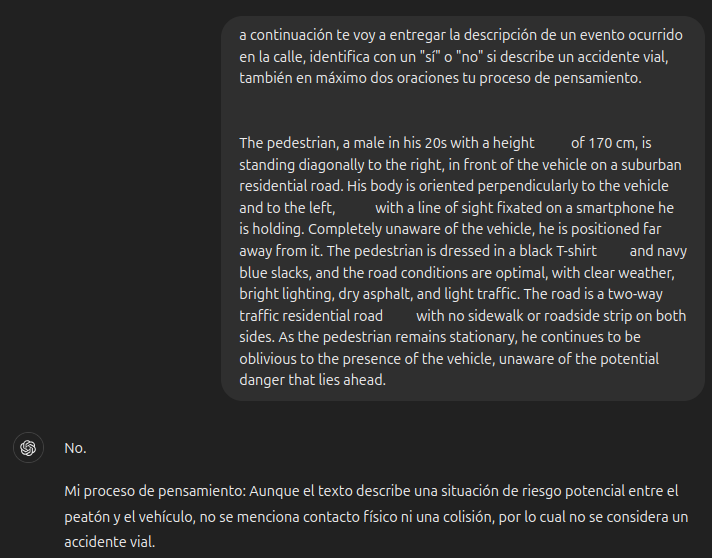

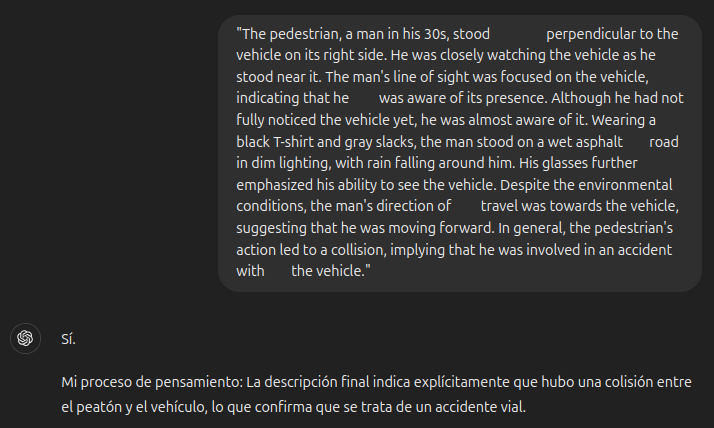

### 7.2 Replicate con llama 3

https://replicate.com/blog/run-llama-3-with-an-api

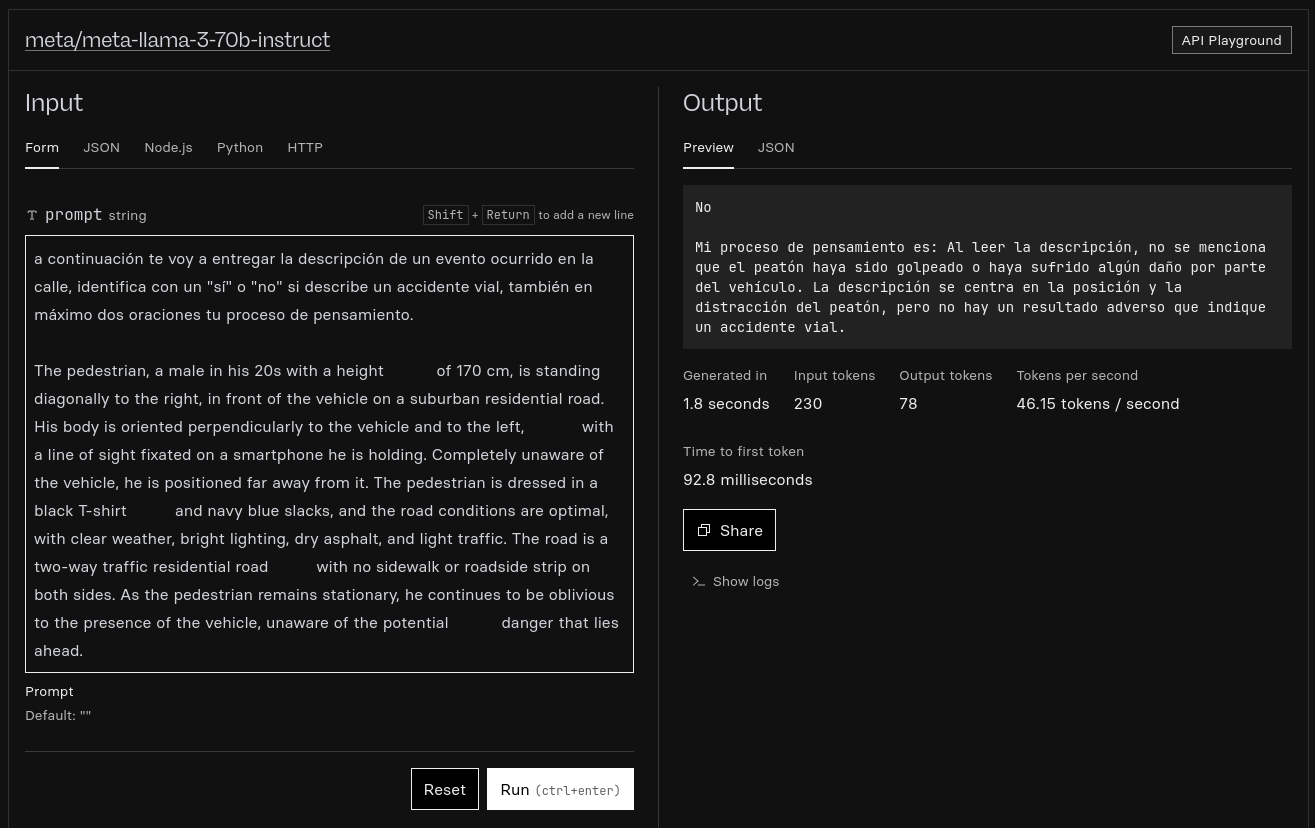

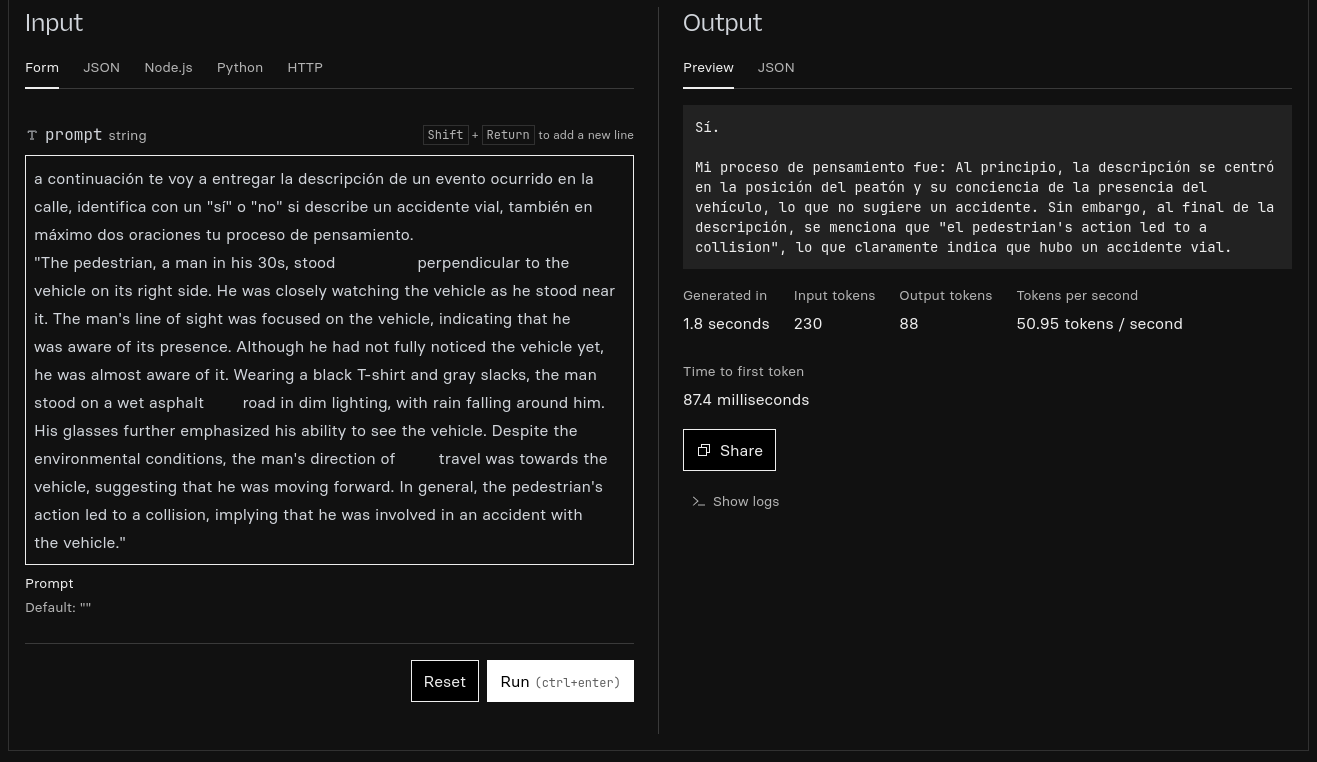

## **Conclusiones**

Según el avance que vimos en las semanas anteriores y la dificultad para converger en varios clusters usando técnicas como K-means y DBSCAN, consideramos explorar la posibilidad de usar modelos generativos de Large Language Models (LLMs) para identificar si el texto corresponde a un accidente vial.

Lo primero que hicimos en este avance fue extraer los datos relevantes de los archivos JSON y generar un archivo CSV; este proceso se encuentra en el directorio `scripts/`. Después investigamos los datos en busca de palabras clave que pudieran indicar que el dataset contiene suficiente información para identificar un accidente, por lo que definimos varias palabras clave en inglés, como accident, caution, collision, entre otras. Finalmente, probamos varios prompts y ejemplos de texto de WTS en el servicio de chat de modelos como GPT-4 y Llama 3. Con estas pruebas, observamos que es posible hacer una clasificación para accidente vial.


El siguiente paso para nuestro proyecto es utilizar una API de alguno de estos modelos para obtener estas respuestas de manera programática.  

## **Repositorio**

https://github.com/marcelarosalesj/mna_proyecto_integrador_equipo13